In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import networkx as nx


### Functions

In [2]:
def F(x):
    #Internal dynamics of each node
    return x

In [3]:
def G(x):
    #External dynamics of each node
    #(Nothing)
    return x

In [4]:
def iterate(x0,f,iters=100):
    """
    Returns n length orbit of x0 under f
    Params
    ------
    x0 : scalar or ndarray
    f : function
    n : positive integer
    Returns
    -------
    orbit : ndarray- orbit of x0 under f
    """
    orbit = [x0]
    x = x0
    for i in range(iters):
        x = f(x)
        orbit.append(x)
    return np.array(orbit)

In [7]:
def getGraphDynam(F,G,A,d=.2):
    """
    Computes the orbit of x under the following equation:
    x_i[k+1] = F(x_i[k])+d*SUM_j{ A_ij*[G(x_i[k])-G(x_j[k])] }
         for j = 1,2, ... n
     Parameters
     ----------
     F (function): Internal dynamics of nodes
     G (function): How nodes affect eachother
     A (nxn ndarray): Adjacency Matrix
     d (float): dampening parameter
     
     Returns
     -------
     GraphDynam (function) : dynamics on graph as described above
    """
    deg = A.sum(axis=1)
    L = np.diag(deg) - A

    def GraphDynam(x):
        return F(x) + d*np.dot(L,G(x))
    
    return GraphDynam

In [8]:
def plotAllOrb(orb,k=0):
    #Plots every orbit
    m,n = orb.shape
    
    if k == 0:
        iteraxis = np.arange(m)
    if k < 0:
        iteraxis = np.arange(m+k,m)
    if k > 0:
        iteraxis = np.arange(k,m)
        
    
    plt.rcParams['figure.figsize'] = (10,5)
    for i in range(n):
        plt.plot(iteraxis,orb[k:,i],label="Node "+str(i+1))
    plt.xlabel("Iteration")
    plt.ylabel("Node Values")
    plt.legend()
    plt.show()
    print("Node variance in last iteration: {}".format(np.var(orb[-1])))

In [9]:
def plotRandomOrbits(orb,k=0):
    #Plots ten random orbits
    m,n = orb.shape
    
    if k == 0:
        iteraxis = np.arange(m)
    if k < 0:
        iteraxis = np.arange(m+k,m)
    if k > 0:
        iteraxis = np.arange(k,m)
        
    nodes = np.random.choice(range(n),size=10,replace=False)
    plt.rcParams['figure.figsize'] = (10,5)
    for n in nodes:
        plt.plot(iteraxis,orb[k:,n],label="Node "+str(n+1))
    
    plt.xlabel("Iteration")
    plt.ylabel("Node Values")
    plt.legend()
    plt.show()
    print("Variance in last orbit: {}".format(np.var(orb[-1])))

We'll look at what happens when we iterate the function on several values from the interval [-1,1]

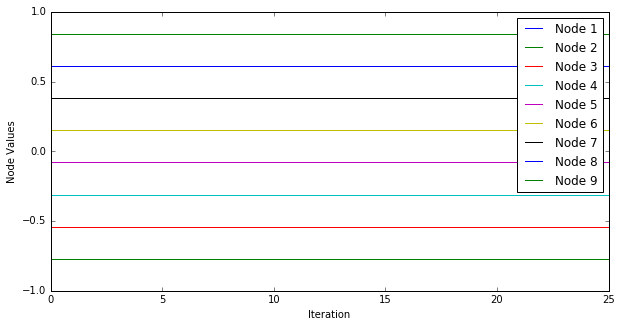

Node variance in last iteration: 0.352666666667


In [10]:
x0 = np.arange(-1,1,.23)
plotAllOrb(iterate(x0,F,iters=25))

## Intro


### Feedback Network

This is the network we discussed in our meeting. You can see a picture of it as well as the dynamics it exhibits.

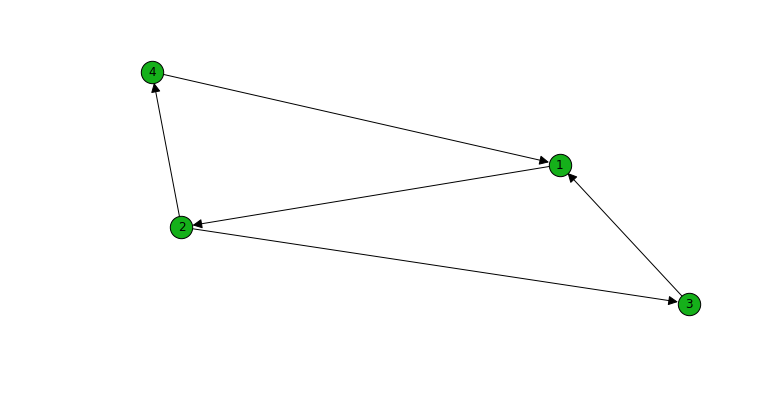

In [11]:
A = np.array([
    [0,0,1,1],
    [1,0,0,0],
    [0,1,0,0],
    [0,1,0,0]
])

Gr = nx.from_numpy_matrix(A.T,create_using=nx.DiGraph())
labels = {0:'1',1:'2',2:'3',3:'4'}
options = {
    'node_color': '#15b01a',
    'node_size': 500,
    'width': 1,
    'arrowsize': 20,
    'with_labels':True,
    'labels':labels,
    'arrows':True
}
nx.draw(Gr,**options)
plt.show()


** Dynamics on the network **

Low d-value

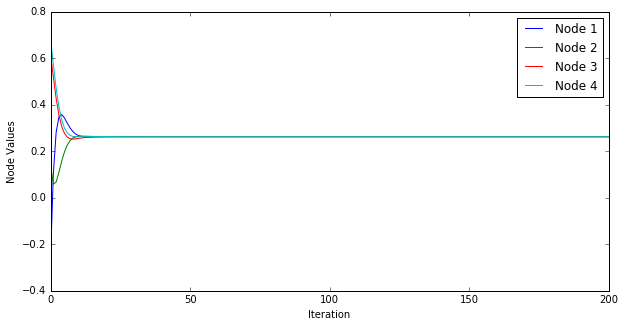

Node variance in last iteration: 6.93334779979e-33


In [12]:
#Initial Conditions on nodes
m,n = A.shape
x = np.random.rand(n)*2 - 1
x0 = x
GraphDyn = getGraphDynam(F,G,A,d=-.2)
orbit = iterate(x0,GraphDyn,iters=200)
plotAllOrb(orbit)

High d-value

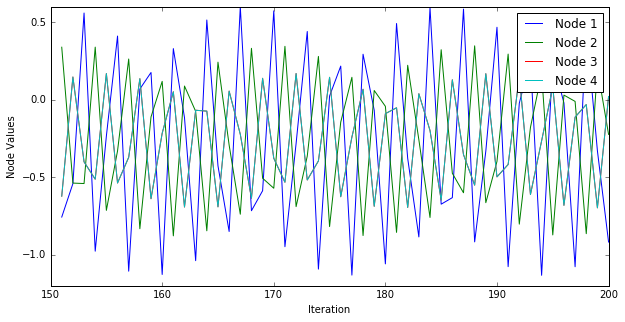

Node variance in last iteration: 0.147868321645


In [13]:
#Initial Conditions on nodes
m,n = A.shape
x = np.random.rand(n)*2 - 1
x0 = x
GraphDyn = getGraphDynam(F,G,A,d=-.8)
orbit = iterate(x0,GraphDyn,iters=200)
plotAllOrb(orbit,k=-50)

In [14]:
#Last four iterations
orbit[-6:,:]

array([[ 0.25589882, -0.87182585,  0.08314893,  0.08314893],
       [-0.02050101,  0.03035389, -0.68083089, -0.68083089],
       [-1.07702882, -0.01033003, -0.11188307, -0.11188307],
       [ 0.46720438, -0.86368906, -0.03064064, -0.03064064],
       [-0.32934765,  0.2010257 , -0.69707938, -0.69707938],
       [-0.91771841, -0.22327298,  0.02140468,  0.02140468]])

We see that node 1, the first column, is not close to the other three nodes. Node 3 nad node 4 are very similar in value, and node 2 follows them closely but not perfectly.

### Specialized Feeback Network

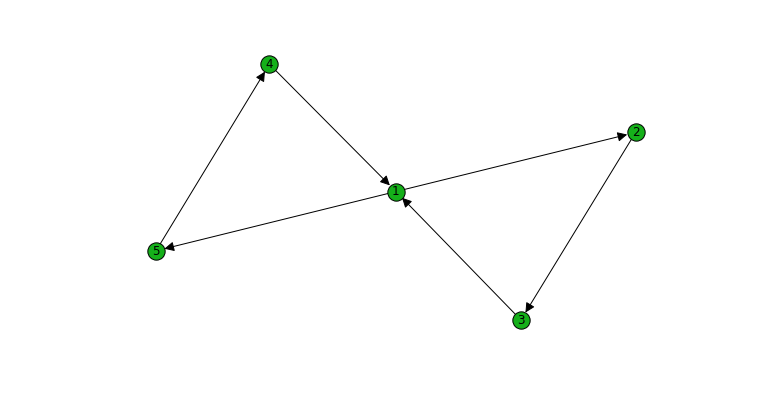

In [15]:
sA = np.array([
    [0,0,1,1,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,0,0,1],
    [1,0,0,0,0]
])

sGr = nx.from_numpy_matrix(sA.T,create_using=nx.DiGraph())
labels = {0:'1',1:'2',2:'3',3:'4',4:'5'}
options = {
    'arrows':True,
    'arrowsize':20,
    'node_color':'#15b01a',
    'labels':labels
}
nx.draw(sGr,**options)
plt.show()

Small d-value

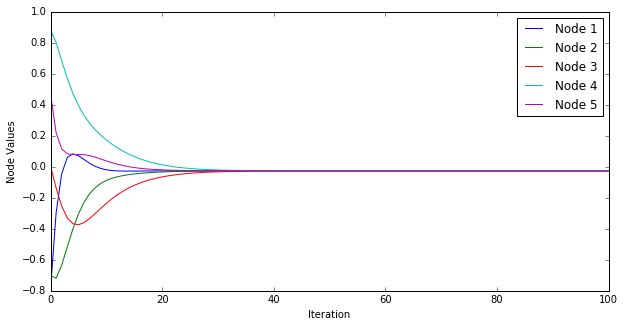

Node variance in last iteration: 3.77936030881e-18

Last four iterations:
[[-0.02641054 -0.02641054 -0.02641055 -0.02641053 -0.02641054]
 [-0.02641054 -0.02641054 -0.02641054 -0.02641053 -0.02641054]
 [-0.02641054 -0.02641054 -0.02641054 -0.02641054 -0.02641054]
 [-0.02641054 -0.02641054 -0.02641054 -0.02641054 -0.02641054]]


In [16]:
m,n = sA.shape
x = np.random.rand(n)*2-1
x0 = x
GraphDyn = getGraphDynam(F,G,sA,d=-0.2)
orbit = iterate(x0,GraphDyn,iters=100)
plotAllOrb(orbit,)
print("\nLast four iterations:")
print(orbit[-4:,:])

High d-value

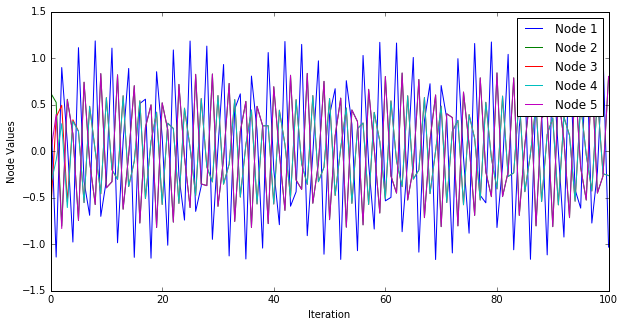

Node variance in last iteration: 0.498428691287

Last four iterations:
[[-0.77155081  0.84149156 -0.42683391 -0.42683391  0.84149156]
 [-0.22000376 -0.44894234  0.58782647  0.58782647 -0.44894234]
 [ 1.0725246  -0.26579148 -0.24158858 -0.24158858 -0.26579148]
 [-1.03005648  0.80486139 -0.2609509  -0.2609509   0.80486139]]


In [17]:
m,n = sA.shape
x = np.random.rand(n)*2-1
x0 = x
GraphDyn = getGraphDynam(F,G,sA,d=-0.8)
orbit = iterate(x0,GraphDyn,iters=100)
plotAllOrb(orbit,)
print("\nLast four iterations:")
print(orbit[-4:,:])

Nodes 2 and 5 synchronize and nodes 3 and 4 synchronize. It makes sense because of the symmetry in the graph.

### Other networks

For the following networks, we will look at synchronization and the effect of specialization

** Plotting Function **

In [18]:
def netwDyn(A,d=.2,k=0,x0=None,iters=100,graph=True):
    """
    Plot node dynamics using the functions above
    """
    m,n = A.shape
    if graph:
        labels = {}
        for i in range(n):
            labels[i]=str(i+1)
        gr = nx.from_numpy_matrix(A.T,create_using=nx.DiGraph())
        nx.draw(gr,arrows=True,node_color='#15b01a',labels=labels)
        plt.show()
    
    if x0 is None:
        x0 = np.random.rand(n)*2-1

    GraphDyn = getGraphDynam(F,G,A,d=d)
    orbit = iterate(x0,GraphDyn,iters=iters)
    
    if n > 13:
        plotRandomOrbits(orbit,k=k)
    else:
        plotAllOrb(orbit,k=k)
    
    print("\nLast four iterations:")
    print(orbit[-4:,:])
    
    return x0
    

### Chain and Triangle

I'm including these as a sort of control.

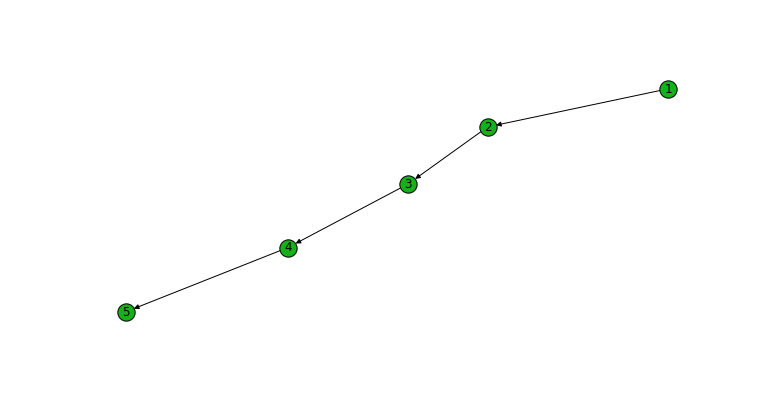

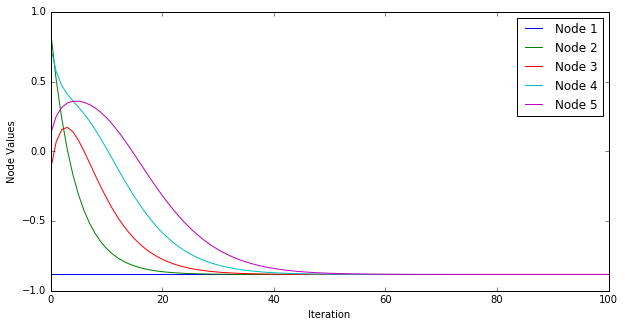

Node variance in last iteration: 1.38519738282e-13

Last four iterations:
[[-0.88298854 -0.88298854 -0.88298852 -0.88298833 -0.88298684]
 [-0.88298854 -0.88298854 -0.88298853 -0.88298837 -0.88298714]
 [-0.88298854 -0.88298854 -0.88298853 -0.8829884  -0.88298738]
 [-0.88298854 -0.88298854 -0.88298853 -0.88298843 -0.88298759]]


In [19]:
A = np.array([
    [0,0,0,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0]
])
x0 = netwDyn(A,d=-.2)

Though it looks like the chain is synchronizing it actually isn't

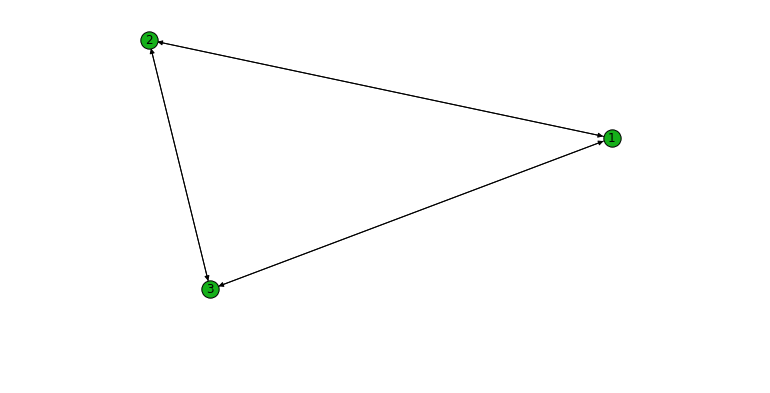

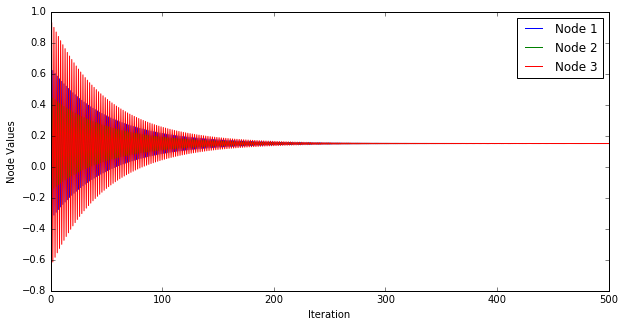

Node variance in last iteration: 5.42390470994e-10

Last four iterations:
[[0.15023048 0.15023856 0.15028654]
 [0.15027281 0.15026489 0.15021787]
 [0.15023132 0.15023909 0.15028517]
 [0.15027198 0.15026437 0.15021922]]


In [20]:
A = np.array([[0,1,1],
              [1,0,1],
              [1,1,0]])

x0 = netwDyn(A,d=-.66,iters=500)

Nodes 1 and 3 synchronize

### Star

Low d-value

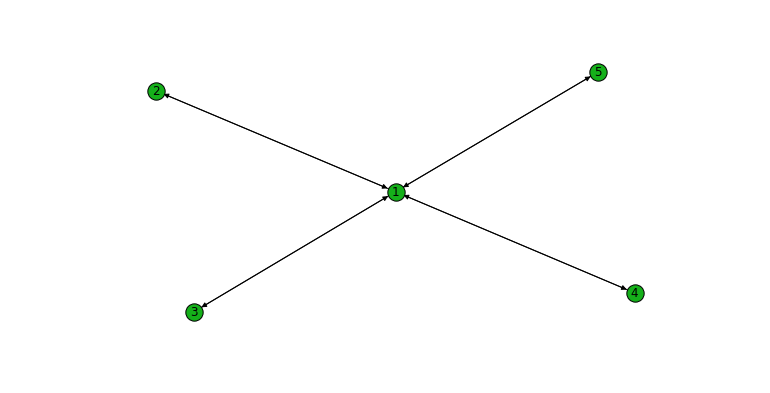

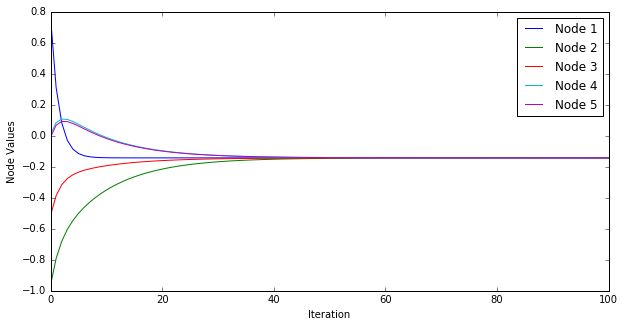

Node variance in last iteration: 9.13583274899e-11

Last four iterations:
[[-0.14242435 -0.14244601 -0.14242961 -0.14241054 -0.14241124]
 [-0.14242435 -0.14244385 -0.14242908 -0.14241192 -0.14241255]
 [-0.14242435 -0.1424419  -0.14242861 -0.14241317 -0.14241373]
 [-0.14242435 -0.14244014 -0.14242818 -0.14241428 -0.14241479]]


In [21]:
nNodes = 5
A = np.zeros((nNodes,nNodes))
A[0,:] = np.ones(nNodes)
A[:,0] = np.ones(nNodes)

x0 = netwDyn(A,d=-.1)

High d-value

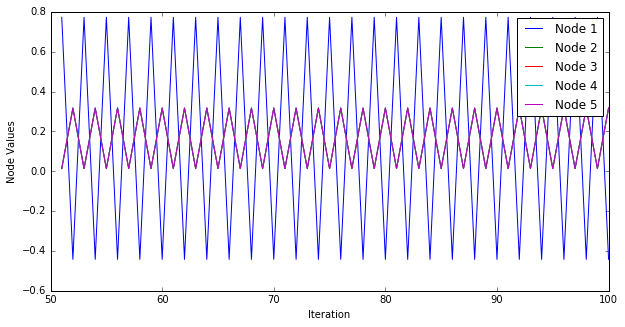

Node variance in last iteration: 0.0922161910267

Last four iterations:
[[ 0.77248559  0.01330762  0.01330762  0.01330762  0.01330762]
 [-0.44219917  0.31697881  0.31697881  0.31697881  0.31697881]
 [ 0.77248559  0.01330762  0.01330762  0.01330762  0.01330762]
 [-0.44219917  0.31697881  0.31697881  0.31697881  0.31697881]]


In [22]:
x0 = netwDyn(A,d=-.4,k=-50,graph=False)

At the highest d values and for specific starting points nodes 2-5 syncrhonize and node 1 exhibits different behavior.

### Specialized Star
Specializing the above graph with nodes 2-5 as the base gives

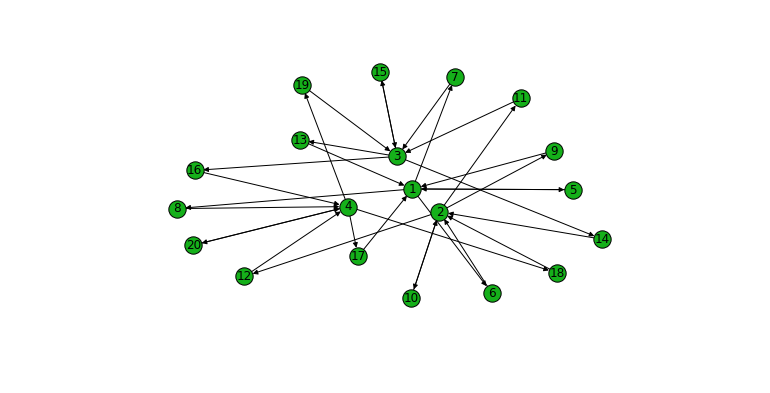

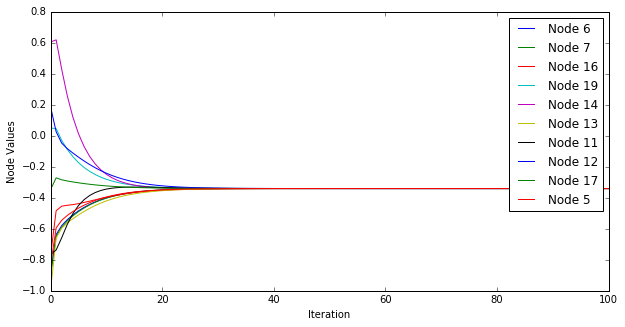

Variance in last orbit: 5.30796486304e-19

Last four iterations:
[[-0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482
  -0.34024482 -0.34024482 -0.34024481 -0.34024481 -0.34024481 -0.34024481
  -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482
  -0.34024482 -0.34024482]
 [-0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482
  -0.34024482 -0.34024482 -0.34024481 -0.34024481 -0.34024481 -0.34024481
  -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482
  -0.34024482 -0.34024482]
 [-0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482
  -0.34024482 -0.34024482 -0.34024482 -0.34024481 -0.34024482 -0.34024481
  -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482
  -0.34024482 -0.34024482]
 [-0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482
  -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482 -0.34024482
  -0.34024482 -0.34024482 -0.34024482 -0

In [23]:
z = np.zeros((20,4))
Z = np.zeros((16,16))
I = np.eye(4)
Irow = np.hstack((np.hstack((I,I)),np.hstack((I,I))))
A = np.hstack((z,np.vstack((Irow,Z))))
for j in range(4):
    A[4+4*j:8+4*j,j] = np.ones(4)
x0 = netwDyn(A,d=-.2)

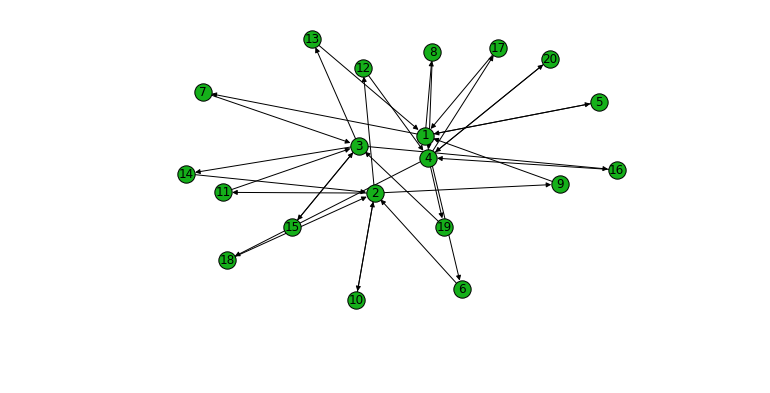

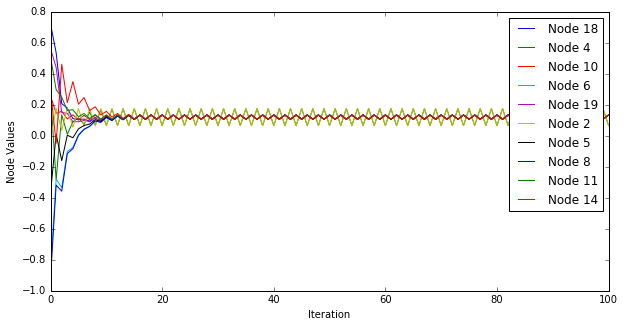

Variance in last orbit: 0.000755406753849

Last four iterations:
[[0.17550116 0.17550116 0.17550116 0.17550116 0.1067895  0.1067895
  0.1067895  0.1067895  0.1067895  0.1067895  0.1067895  0.1067895
  0.1067895  0.1067895  0.1067895  0.1067895  0.1067895  0.1067895
  0.1067895  0.1067895 ]
 [0.0655625  0.0655625  0.0655625  0.0655625  0.13427416 0.13427416
  0.13427416 0.13427416 0.13427416 0.13427416 0.13427416 0.13427416
  0.13427416 0.13427416 0.13427416 0.13427416 0.13427416 0.13427416
  0.13427416 0.13427416]
 [0.17550116 0.17550116 0.17550116 0.17550116 0.1067895  0.1067895
  0.1067895  0.1067895  0.1067895  0.1067895  0.1067895  0.1067895
  0.1067895  0.1067895  0.1067895  0.1067895  0.1067895  0.1067895
  0.1067895  0.1067895 ]
 [0.0655625  0.0655625  0.0655625  0.0655625  0.13427416 0.13427416
  0.13427416 0.13427416 0.13427416 0.13427416 0.13427416 0.13427416
  0.13427416 0.13427416 0.13427416 0.13427416 0.13427416 0.13427416
  0.13427416 0.13427416]]


array([ 0.57699636, -0.01803619, -0.55610939,  0.25939925, -0.36781399,
       -0.85170444,  0.56145278, -0.91521522, -0.93235447,  0.25439143,
        0.507428  ,  0.32138923,  0.69234146,  0.29077817,  0.60031734,
        0.96128119,  0.43455077,  0.72031942,  0.56186455, -0.6906396 ])

In [24]:
netwDyn(A,d=-.4)

At high d-values, the network exhibits the same behavior as the unspecialized network! Nodes 1-4 represent specialized node 1 from the previous network.

### Triangle with Tail

Low d-value

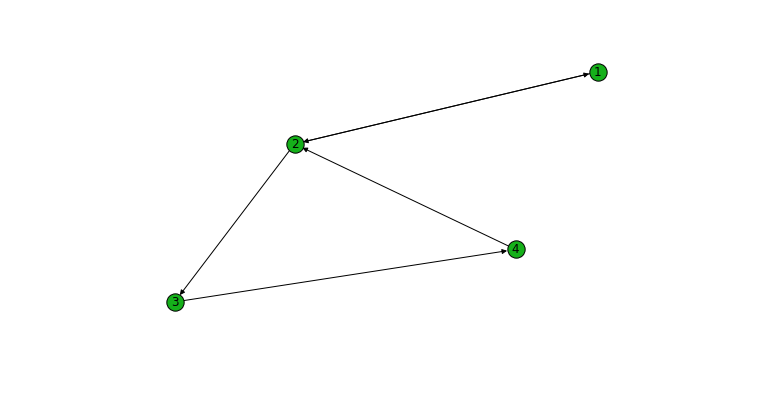

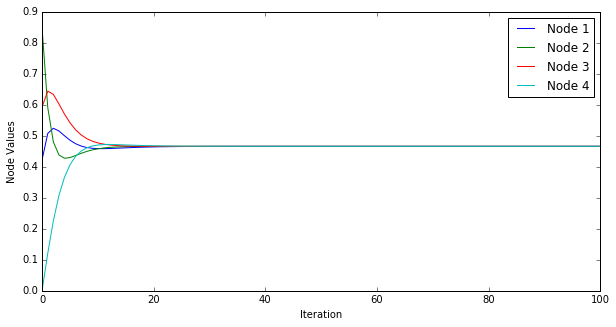

Node variance in last iteration: 6.03096937383e-22

Last four iterations:
[[0.46599208 0.46599208 0.46599208 0.46599208]
 [0.46599208 0.46599208 0.46599208 0.46599208]
 [0.46599208 0.46599208 0.46599208 0.46599208]
 [0.46599208 0.46599208 0.46599208 0.46599208]]


In [25]:
A = np.array([
    [0,1,0,0],
    [1,0,0,1],
    [0,1,0,0],
    [0,0,1,0]
])
x0 = netwDyn(A,d=-.2,iters=100)

High d-value

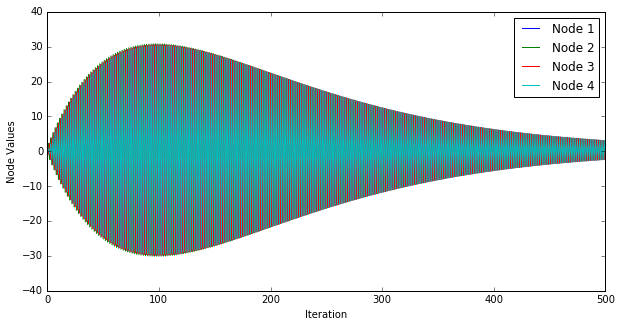

Node variance in last iteration: 7.27971131288

Last four iterations:
[[-2.40111545  3.13243208 -2.40111545  3.12137384]
 [ 3.10476434 -2.38445065  3.10476434 -2.373503  ]
 [-2.35700458  3.08821118 -2.35700458  3.077373  ]
 [ 3.06098511 -2.34056249  3.06098511 -2.32983269]]


In [26]:
x0 = netwDyn(A,d=-.995,iters=500,graph=False)

Nodes 1 and 3 synchronize and nodes 2 and 4 synchronize.

### Specialized Triangle with Tail:

Specializing the triangle over nodes 1,3 and 4 gives:

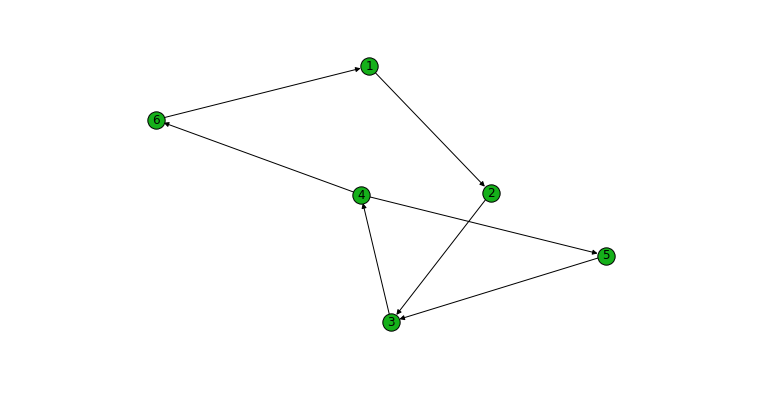

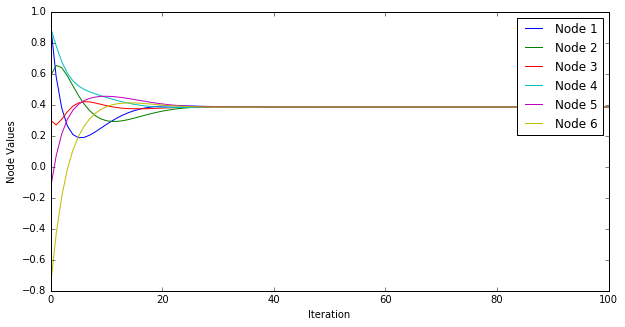

Node variance in last iteration: 8.89428072482e-18

Last four iterations:
[[0.3861366  0.3861366  0.38613659 0.38613659 0.38613659 0.38613659]
 [0.3861366  0.3861366  0.38613659 0.38613659 0.38613659 0.38613659]
 [0.38613659 0.3861366  0.38613659 0.38613659 0.38613659 0.38613659]
 [0.38613659 0.3861366  0.38613659 0.38613659 0.38613659 0.38613659]]


In [27]:
A = np.array([
    [0,0,0,0,0,1],
    [1,0,0,0,0,0],
    [0,1,0,0,1,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0]

])

x0 = netwDyn(A,d=-.2,iters=100)

We have syncronization in nodes 1,2,4-6 and node 3 doing it's own thing. I think this is because node three experiences a delay as signals travel through node four, then down two paths of different lengths back to node three. I think the difference in path length contributes to this behavior.

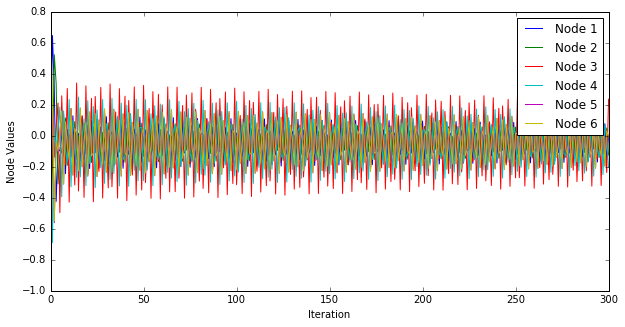

Node variance in last iteration: 0.0185337490238

Last four iterations:
[[-0.11859298 -0.04174698  0.12800906 -0.24981792  0.11231822  0.11231822]
 [ 0.07791245 -0.10714293 -0.02980624  0.07171284 -0.19585963 -0.19585963]
 [-0.15506759  0.0503392  -0.2369312  -0.01467989  0.03184454  0.03184454]
 [ 0.00399463 -0.12446198  0.23626407 -0.20381576 -0.00774775 -0.00774775]]


In [28]:
x0 = netwDyn(A,d=-.851,iters=300,graph=False)

At high d-values only nodes 5 and 6 synchronize. (They receive the same signals from node 4)

### Two Triangles

Low d-value. Note that this is not strongly connected

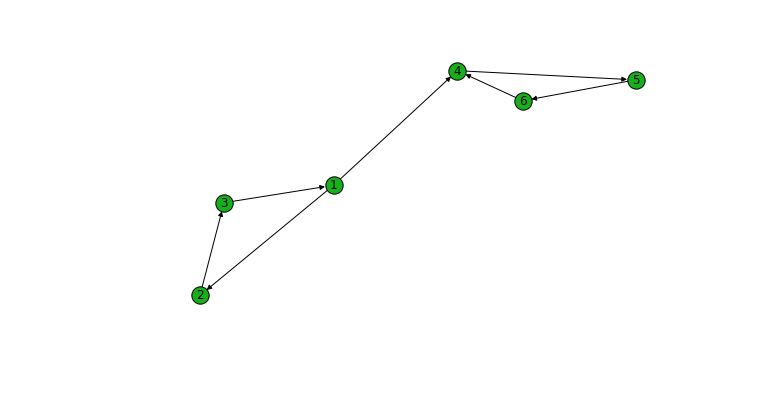

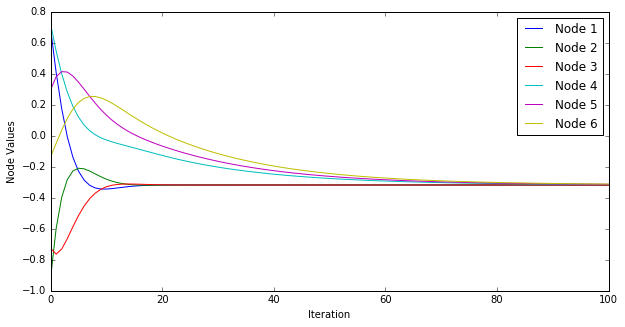

Node variance in last iteration: 5.96719988321e-06

Last four iterations:
[[-0.31744128 -0.31744128 -0.31744128 -0.31346435 -0.31217297 -0.31046225]
 [-0.31744128 -0.31744128 -0.31744128 -0.31365931 -0.31243124 -0.31080439]
 [-0.31744128 -0.31744128 -0.31744128 -0.31384472 -0.31267686 -0.31112976]
 [-0.31744128 -0.31744128 -0.31744128 -0.31402104 -0.31291043 -0.31143918]]


In [29]:
A = A = np.array([
    [0,0,1,0,0,0],
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [1,0,0,0,0,1],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0]

])

x0 = netwDyn(A,d=-.2,iters=100)

Nodes 4-6 synchronize quickly, and nodes 1-3 get close but don't quite match up.

High d-value:

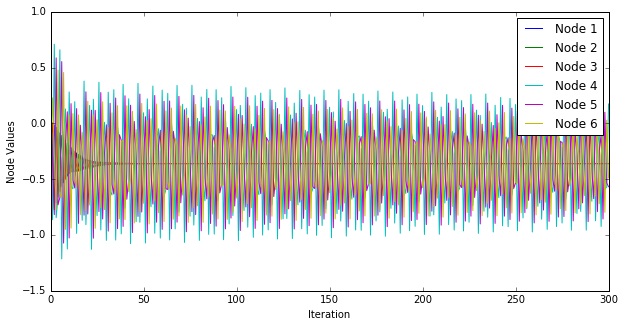

Node variance in last iteration: 0.056362052036

Last four iterations:
[[-0.36015413 -0.36015413 -0.36015413  0.18335069 -0.85697045 -0.11229229]
 [-0.36015413 -0.36015413 -0.36015413 -0.58866529  0.100125   -0.7973962 ]
 [-0.36015413 -0.36015413 -0.36015413 -0.57046746 -0.53356207  0.0283233 ]
 [-0.36015413 -0.36015413 -0.36015413  0.1739083  -0.56751503 -0.48861124]]


In [30]:
x0 = netwDyn(A,d=-.92,iters=300,graph=False)

At high d-values, the nodes separate into two groups. They follow a repeating ocilation.

### Two Triangles Specialized
Specializing with nodes 1-3 and 5-6 as a base gives:

Low d-value

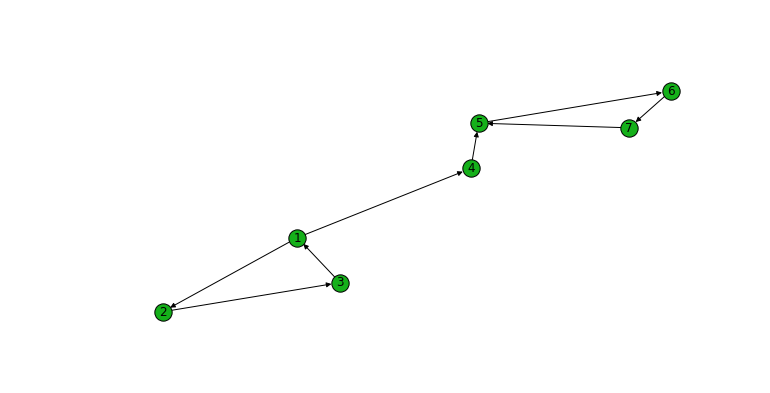

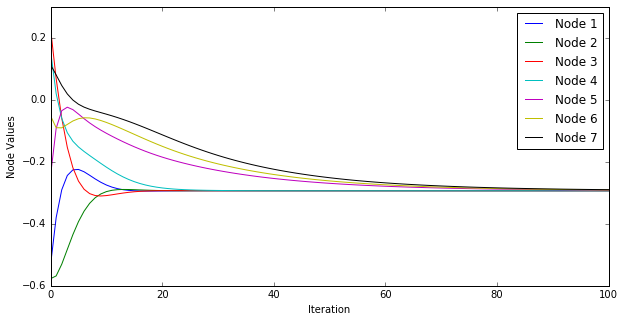

Node variance in last iteration: 1.85519425368e-06

Last four iterations:
[[-0.29333767 -0.29333767 -0.29333767 -0.29333767 -0.29108399 -0.29035218
  -0.28938273]
 [-0.29333767 -0.29333767 -0.29333767 -0.29333767 -0.29119447 -0.29049854
  -0.28957662]
 [-0.29333767 -0.29333767 -0.29333767 -0.29333767 -0.29129954 -0.29063773
  -0.289761  ]
 [-0.29333767 -0.29333767 -0.29333767 -0.29333767 -0.29139946 -0.29077009
  -0.28993635]]


In [31]:
A = np.array([
    [0,0,1,0,0,0,0],
    [1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0],
    [1,0,0,0,0,0,0],
    [0,0,0,1,0,0,1],
    [0,0,0,0,1,0,0],
    [0,0,0,0,0,1,0]

])

x0 = netwDyn(A,d=-.2)

High d-value:

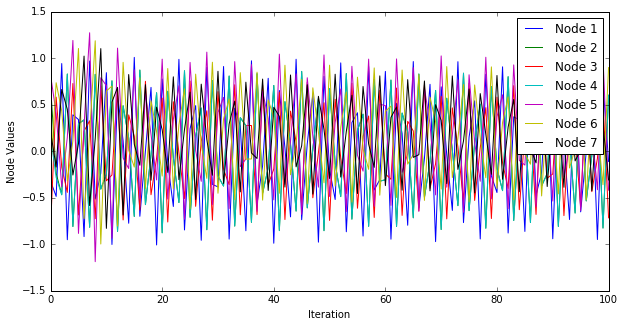

Node variance in last iteration: 0.326579454761

Last four iterations:
[[ 0.65416404 -0.04520178 -0.43393422 -0.04520178  0.22991948  0.61864251
  -0.42425848]
 [-0.94871727  0.59821477 -0.07630037  0.59821477 -0.41350988  0.26101732
   0.53521043]
 [ 0.72672617 -0.82496271  0.54425356 -0.82496271  1.00967039 -0.3595477
   0.28295277]
 [-0.1097367   0.60259106 -0.71542541  0.60259106 -0.41787551  0.90013295
  -0.30814767]]


In [31]:
x0 = netwDyn(A,d=-.92,iters=100,graph=False)

At high d values, we get repeated ocilations

### Network From Paper

Example from specialization paper

Low d-value:

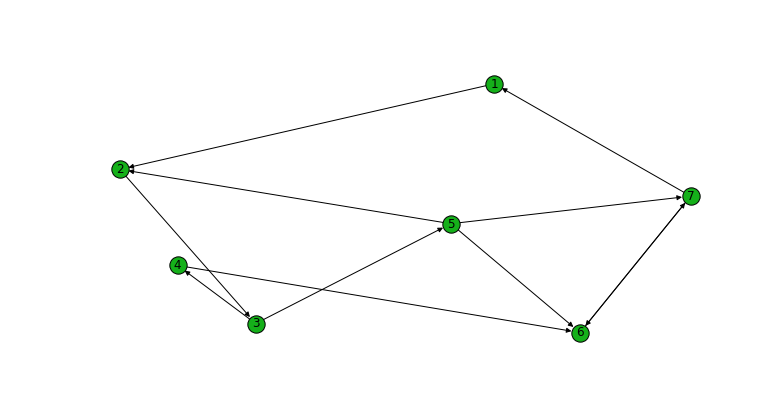

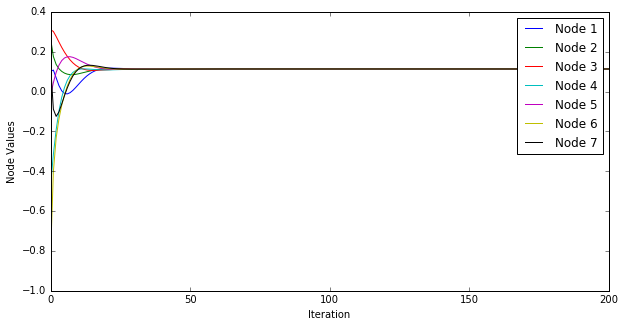

Node variance in last iteration: 3.57672703958e-34

Last four iterations:
[[0.11312854 0.11312854 0.11312854 0.11312854 0.11312854 0.11312854
  0.11312854]
 [0.11312854 0.11312854 0.11312854 0.11312854 0.11312854 0.11312854
  0.11312854]
 [0.11312854 0.11312854 0.11312854 0.11312854 0.11312854 0.11312854
  0.11312854]
 [0.11312854 0.11312854 0.11312854 0.11312854 0.11312854 0.11312854
  0.11312854]]


In [32]:
A = np.array([
    [0,0,0,0,0,0,1],
    [1,0,0,0,1,0,0],
    [0,1,0,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,0,0,1,1,0,1],
    [0,0,0,0,1,1,0]

])

x0 = netwDyn(A,d=-.2,iters=200)

Nodes 1 and 7 synchronize, and nodes 3 and 4 synchronize.

High d-value

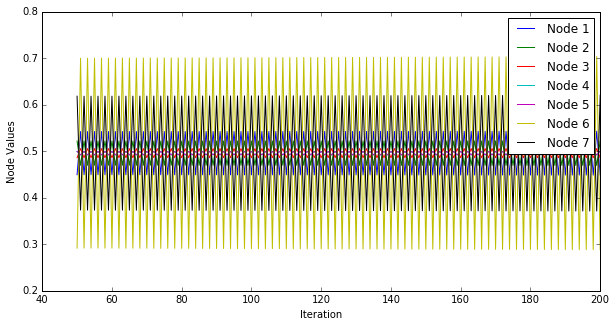

Node variance in last iteration: 0.00858215109146

Last four iterations:
[[0.54324438 0.46950309 0.50608388 0.49220947 0.49220947 0.70358878
  0.37152697]
 [0.4487998  0.52254931 0.48596444 0.4998404  0.4998404  0.28843755
  0.62053634]
 [0.5432549  0.46949718 0.50608612 0.49220862 0.49220862 0.70363502
  0.37149924]
 [0.44878928 0.52255522 0.4859622  0.49984125 0.49984125 0.2883913
  0.62056408]]


In [40]:
x = np.array([-0.7606246 ,  0.18381638,  0.82754076,  0.82751412,  0.81426085,
        0.58567302,  0.91064642])
x0 = netwDyn(A,d=-.55,iters=200,x0=x,k=50,graph=False)

I kept the above starting value because it seems to illustrate a transition from the smooth behavior to ocilations we see at higher d-values

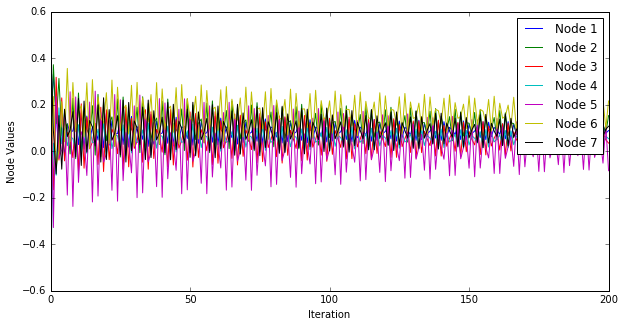

Node variance in last iteration: 0.00774606919067

Last four iterations:
[[ 0.05975417  0.12219442  0.00749287  0.08350933  0.05262423  0.11170835
   0.13577063]
 [ 0.11205349  0.115441    0.08125244  0.03121001 -0.05083708  0.22192308
   0.06201106]
 [ 0.0776243   0.07813448  0.04887249  0.0656392   0.10999234  0.09840018
   0.09439101]
 [ 0.0891598   0.1534582   0.03538047  0.05410371 -0.08340757  0.21647637
   0.10788303]]


In [34]:
x0 = netwDyn(A,d=-.688,iters=200,graph=False)

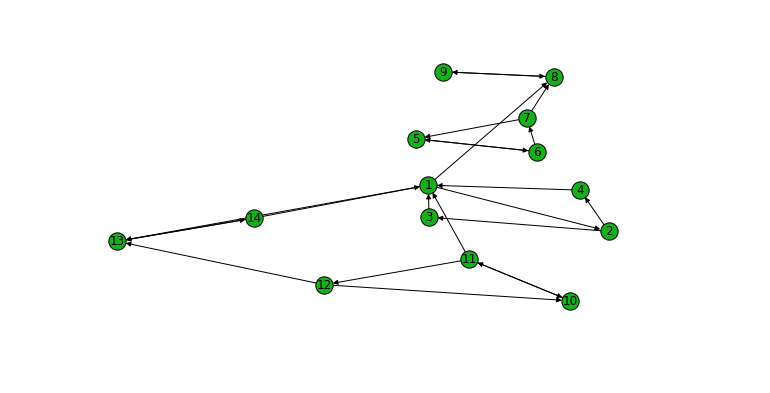

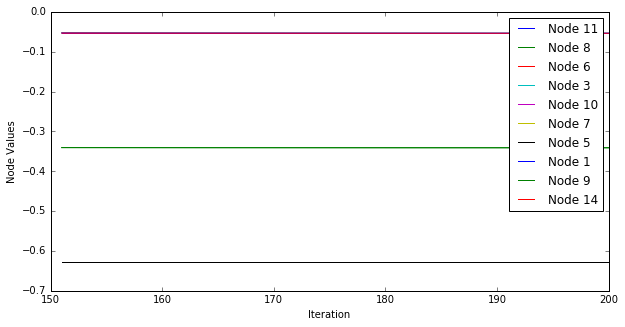

Variance in last orbit: 0.0556325383061

Last four iterations:
[[-0.05368298 -0.05365579 -0.05362232 -0.05362232 -0.62855393 -0.62855393
  -0.62855393 -0.34110287 -0.34108568 -0.05380042 -0.05380042 -0.05380042
  -0.05372612 -0.05370892]
 [-0.05368739 -0.05366123 -0.05362901 -0.05362901 -0.62855393 -0.62855393
  -0.62855393 -0.34110567 -0.34108911 -0.05380042 -0.05380042 -0.05380042
  -0.05372891 -0.05371236]
 [-0.05369164 -0.05366646 -0.05363546 -0.05363546 -0.62855393 -0.62855393
  -0.62855393 -0.34110835 -0.34109243 -0.05380042 -0.05380042 -0.05380042
  -0.0537316  -0.05371567]
 [-0.05369573 -0.0536715  -0.05364166 -0.05364166 -0.62855393 -0.62855393
  -0.62855393 -0.34111094 -0.34109561 -0.05380042 -0.05380042 -0.05380042
  -0.05373419 -0.05371886]]


array([-0.14437525, -0.2550905 , -0.16287092,  0.48715224, -0.53546195,
       -0.67143793, -0.63587792,  0.47743033,  0.41471283,  0.23781188,
       -0.61572864,  0.77844372,  0.91174289,  0.75158849])

In [50]:
comp = np.array([
    [0,1,1,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,1],
    [0,0,0,1,0]
])
As = la.block_diag(A,comp,comp)
As[7,0] = 1
As[12,0] = 1
As[0,10] = 1
As[0,-1] = 1

netwDyn(As,d=-.2,k=-50,iters=200)

Nodes 0,6,9,10,11,14,16


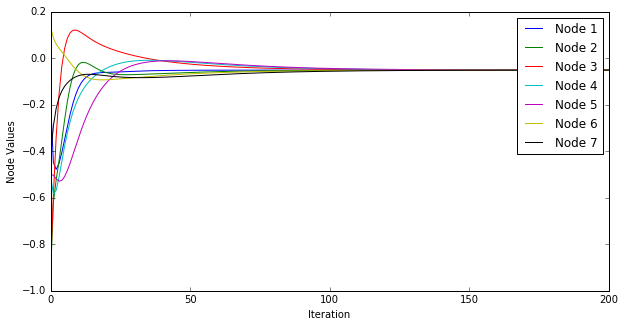

Node variance in last iteration: 5.29952336331e-09

Nodes 5,8,13,15


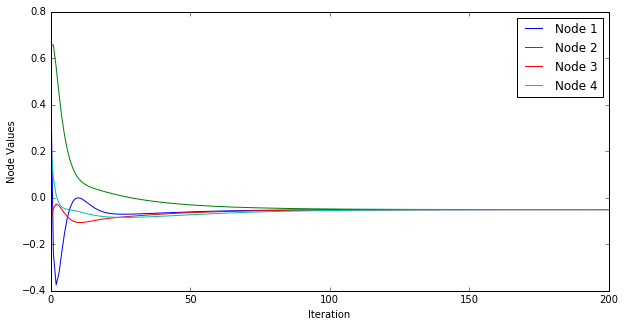

Node variance in last iteration: 1.88948792734e-09

Nodes 2,3


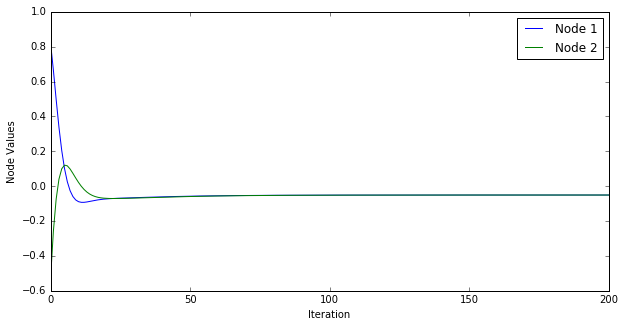

Node variance in last iteration: 6.12452548795e-13

Nodes 7,12


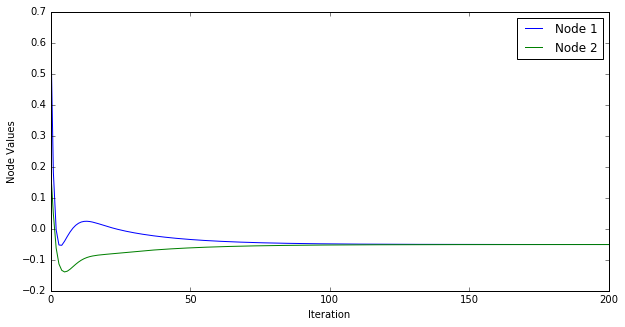

Node variance in last iteration: 9.9112935615e-10

Nodes 1,4,6


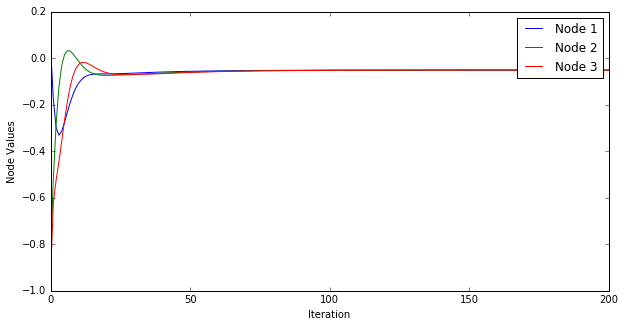

Node variance in last iteration: 3.14085597162e-12


In [44]:
x = np.array([-0.18599242,  0.04986844,  0.82033016, -0.52941828, -0.84918675,
        0.561024  , -0.93716901,  0.67131711,  0.65481649, -0.90039793,
       -0.50535021, -0.50121304,  0.1968458 , -0.10584856,  0.13650518,
        0.23904351, -0.42381305])
Dynam = getGraphDynam(F,G,As,d=-.2)
orbit = iterate(x,Dynam,iters=200)
print("Nodes {}".format("0,6,9,10,11,14,16"))
mask = np.array([0,6,9,10,11,14,16])
plotAllOrb(orbit[:,mask])
print("\nNodes {}".format("5,8,13,15"))
mask = np.array([5,8,13,15])
plotAllOrb(orbit[:,mask])
print("\nNodes {}".format("2,3"))
mask = np.array([2,3])
plotAllOrb(orbit[:,mask])
print("\nNodes {}".format("7,12"))
mask = np.array([7,12])
plotAllOrb(orbit[:,mask])
print("\nNodes {}".format("1,4,6"))
mask = np.array([1,4,6])
plotAllOrb(orbit[:,mask])

In [45]:
from specializeGraph import specializeGraph

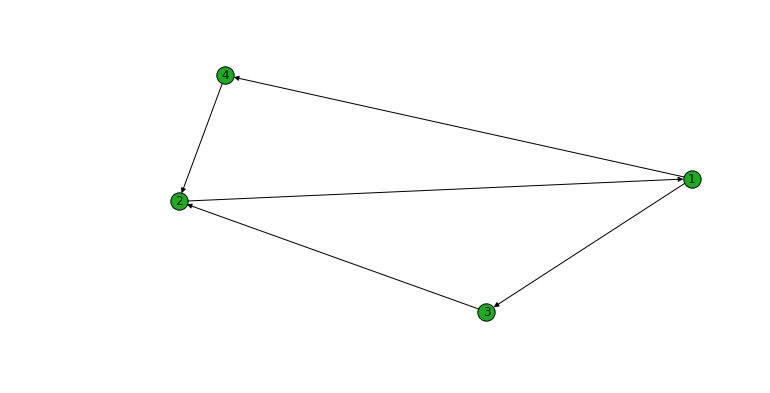

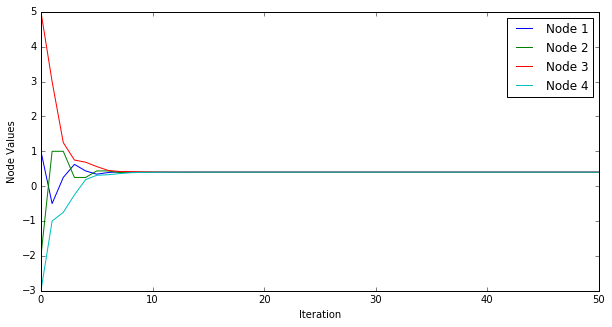

Node variance in last iteration: 7.64209001933e-30

Last four iterations:
[[0.4 0.4 0.4 0.4]
 [0.4 0.4 0.4 0.4]
 [0.4 0.4 0.4 0.4]
 [0.4 0.4 0.4 0.4]]


array([ 1, -2,  5, -3])

In [46]:
A = np.array([
    [0,0,1,1],
    [1,0,0,0],
    [0,1,0,0],
    [0,1,0,0]
])

x = np.array([1,-2,5,-3])
netwDyn(A.T,d=-.5,x0=x,iters=50)

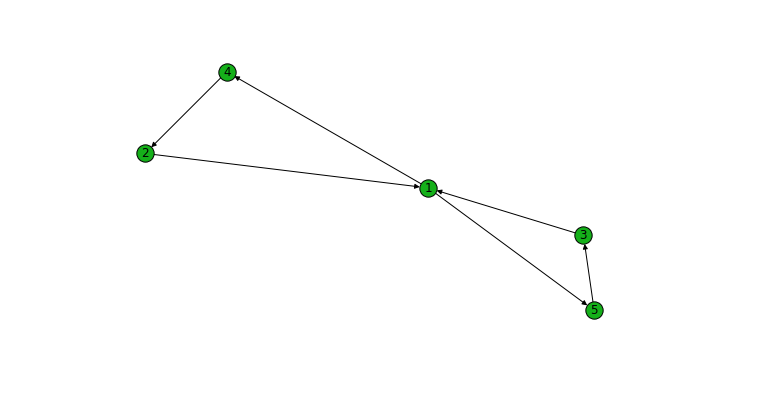

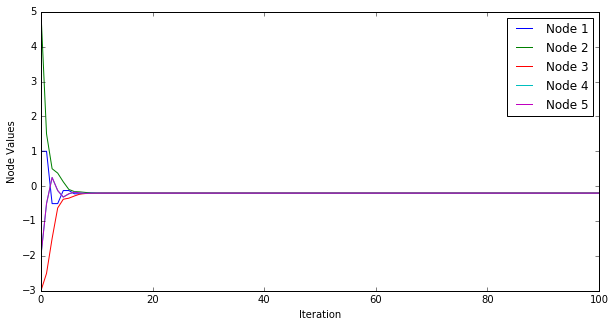

Node variance in last iteration: 0.0

Last four iterations:
[[-0.2 -0.2 -0.2 -0.2 -0.2]
 [-0.2 -0.2 -0.2 -0.2 -0.2]
 [-0.2 -0.2 -0.2 -0.2 -0.2]
 [-0.2 -0.2 -0.2 -0.2 -0.2]]


array([ 1,  5, -3, -2, -2])

In [47]:
sA = specializeGraph(A,[0,2,3])
x = np.array([1,5,-3,-2,-2])
netwDyn(sA,d=-.5,x0=x)